### Gaussian process prior

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("Ready.")

Ready.


### Define a kernel function (`Squared Exponential`)

In [2]:
def kernel_se(x1,x2,hyp={'gain':1.0,'len':1.0}):
    """ Squared-exponential kernel function """
    D = distance.cdist(x1/hyp['len'],x2/hyp['len'],'sqeuclidean')
    K = hyp['gain']*np.exp(-D)
    return K
print ("Ready.")

Ready.


### GP prior

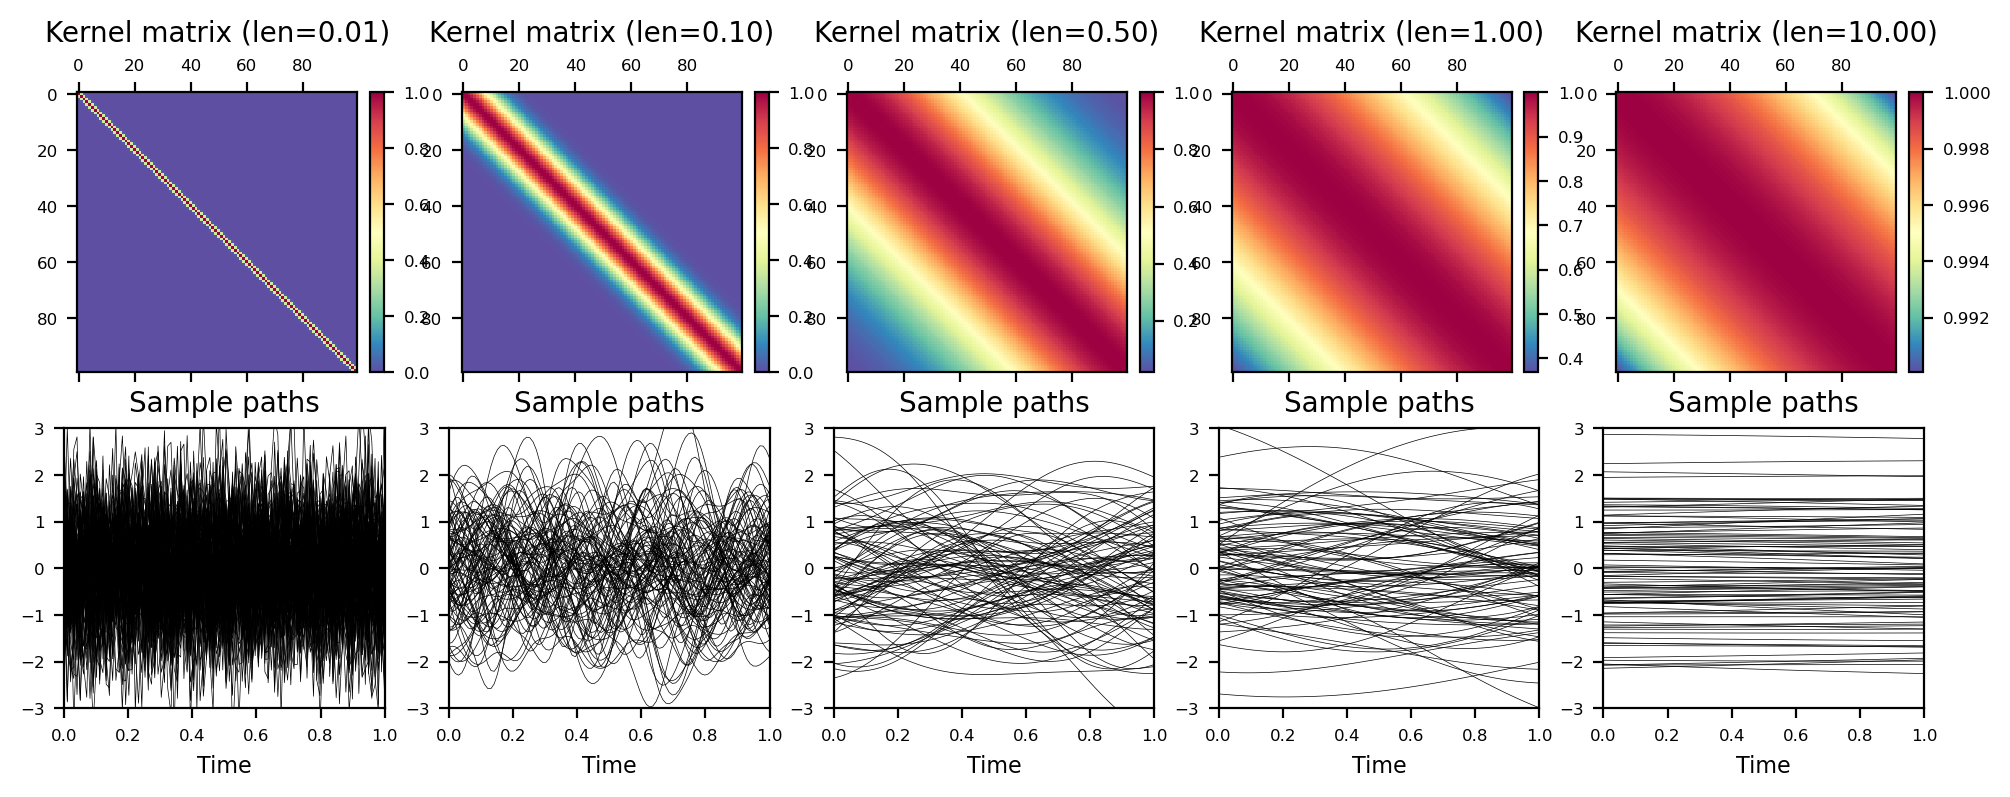

In [3]:
L = 100
t_data = np.linspace(start=0.0,stop=1.0,num=L).reshape((-1,1))
len_vals = [0.01,0.1,0.5,1.0,10.0] # different length parameters
plt.figure(figsize=(12,4))
plt.rcParams.update({'font.size':6})
for l_idx,len_val in enumerate(len_vals): 
    K = kernel_se(t_data,t_data,hyp={'gain':1.0,'len':len_val})
    # Plot kernel matrix
    plt.subplot(2,len(len_vals),l_idx+1)
    plt.matshow(K,fignum=False,cmap=matplotlib.cm.Spectral_r)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title('Kernel matrix (len=%.2f)'%(len_val),fontsize=10)
    # Plot sampled trajectories
    K_chol = np.linalg.cholesky(K+1e-8*np.eye(L,L)) # [L x L]
    n_sample = 100
    sample_path = np.matmul(K_chol,np.random.randn(L,n_sample))
    plt.subplot(2,len(len_vals),l_idx+1+len(len_vals))
    plt.plot(t_data,sample_path,'-',lw=1/4,color='k')
    plt.xlabel('Time',fontsize=8); 
    plt.xlim([0,1]); plt.ylim([-3.0,+3.0])
    plt.title('Sample paths',fontsize=10)
plt.show()

### Check marginal property of GP

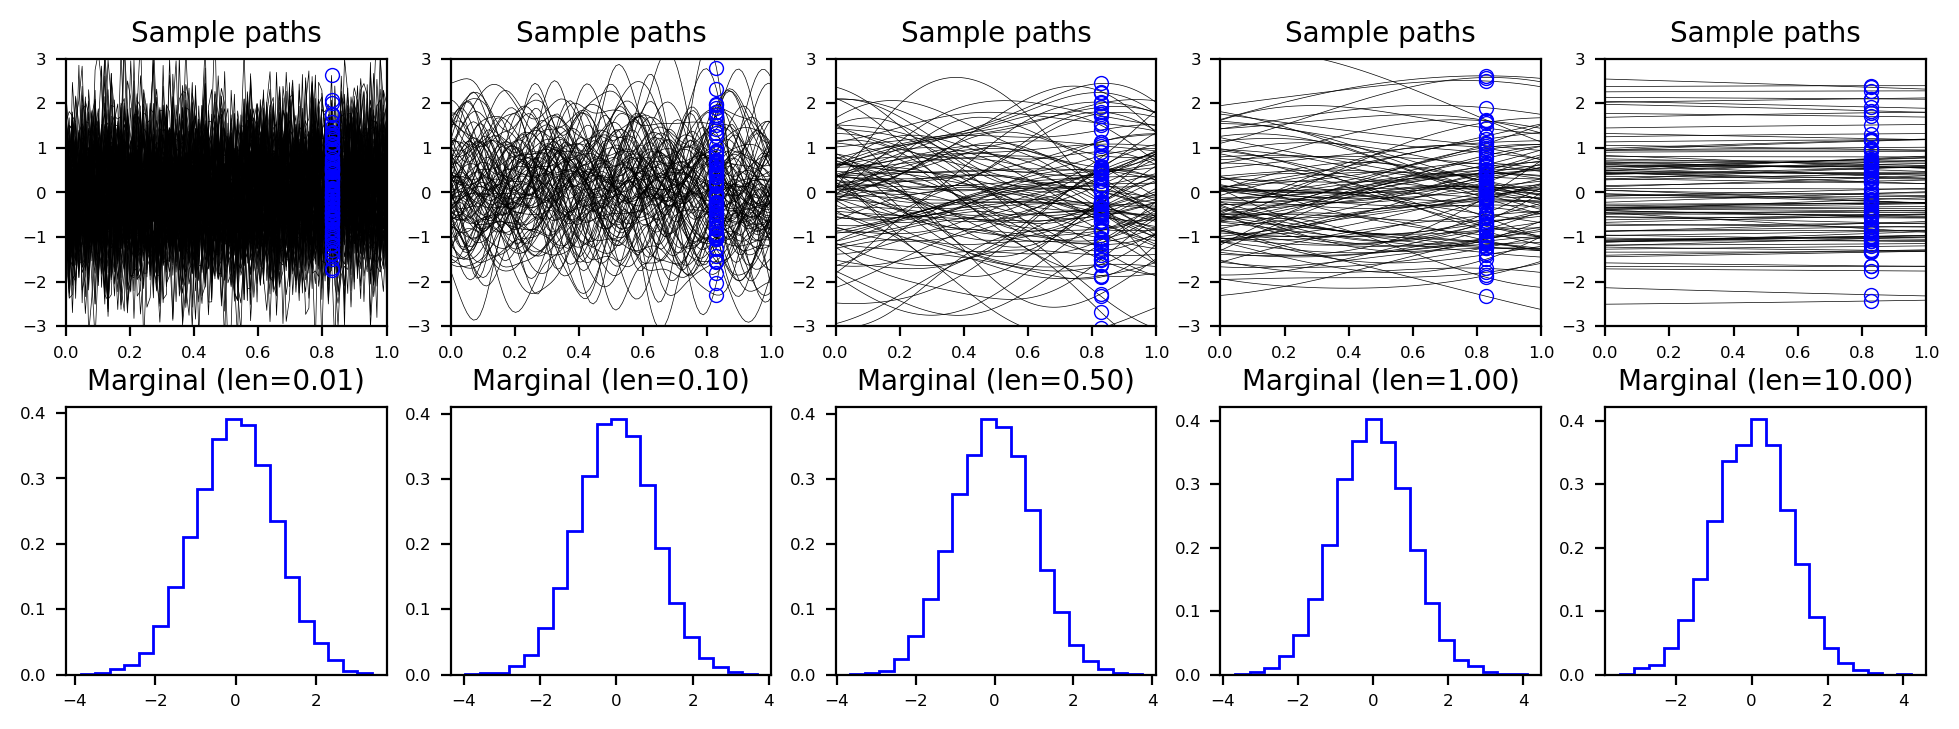

In [4]:
idx_marginal = np.random.randint(low=0,high=L)
plt.figure(figsize=(12,4))
plt.rcParams.update({'font.size':6})
plt.subplots_adjust(hspace=0.3)
for l_idx,len_val in enumerate(len_vals):
    K = kernel_se(t_data,t_data,hyp={'gain':1.0,'len':len_val})
    K_chol = np.linalg.cholesky(K+1e-8*np.eye(L,L)) # [L x L]
    n_sample,n_path2plot = 10000,100
    sample_path = np.matmul(K_chol,np.random.randn(L,n_sample)) # [L x n_sample]
    sample_marginal = sample_path[idx_marginal,:] # [n_sample]
    plt.subplot(2,len(len_vals),l_idx+1)
    plt.plot(t_data,sample_path[:,:n_path2plot],'-',lw=1/4,color='k')
    plt.plot(t_data[idx_marginal]*np.ones(n_path2plot),
             sample_path[idx_marginal,:n_path2plot],
             'o',lw=1/4,color='b',mfc='none',ms=5,mew=0.5)
    plt.xlim([0,1]); plt.ylim([-3.0,+3.0]);
    plt.title('Sample paths',fontsize=10)
    plt.subplot(2,len(len_vals),l_idx+1+len(len_vals))
    plt.hist(sample_marginal,bins=20,density=True,histtype='step',color='b')
    plt.title('Marginal (len=%.2f)'%(len_val),fontsize=10)
plt.show()